In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from wordcloud import WordCloud
import matplotlib.pyplot as plt

import random

In [73]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re
import string 

In [99]:
from unidecode import unidecode

In [94]:
pip install unidecode

     |████████████████████████████████| 235 kB 374 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
import es_core_news_sm
nlp = es_core_news_sm.load()

In [198]:
df = pd.read_csv('items_titles.csv')

In [199]:
df.head(100)

,ITE_ITEM_TITLE
0,Tênis Ascension Posh Masculino - Preto E Verme...
1,Tenis Para Caminhada Super Levinho Spider Corr...
2,Tênis Feminino Le Parc Hocks Black/ice Origina...
3,Tênis Olympikus Esportivo Academia Nova Tendên...
4,Inteligente Led Bicicleta Tauda Luz Usb Bicicl...
...,...
95,Tenis Pampili Link Marinho - 417034
96,Bicicleta Aro 12 Feminina Infantil Nathor Viol...
97,Tenis Fila Euro Jogger Sport Masculino Tamanho...
98,Tênis Napa Branco Meninario


### Similitud entre productos

Comenzamos con un pequeño analisis exploratorio para entender cómo es el texto que queremos clasificar. Primero graficamos las palabras más frecuentes y realizamos algunas observaciones:


1. Palabras iguales escritas de distinta forma: Dado que nos interesa encontrar relaciones entre los productos, el énfasis debe estar en la interpretación del texto y no el texto en sí. Por ejemplo, para nosotros "Tenis" y "Ténis" deberían tener 100% de similitud. 

2. Palabras que hacen ruido: Encontramos también la presencia de palabras/signos que pueden agregar ruido al momento de clasificar los textos. Algunos ejemplos:

- "Tênis Ascension Posh Masculino - Preto": Presencia de símbolos como guiones que no aportan a la clasificación
- "Preto E Vermelho" y "Preto, Vermelho" deberian tener la misma interpretación, sin embargo, la diferencia en la escritura y la incorporación de nuevos caracteres puede disminuir el score de similaridad. 

3. Idioma: Se observan palabras tanto en ingles como en portugues.

Soluciones: 

1. Modificamos el texto pasando todo a minúscula y eliminando acentos
2. Cargamos las 'stopwords" en inglés y portugues y las eliminamos de la cadena string
3. Con el punto 3 en esta instancia no se trabajó, sin embargo es posible traducir el texto utilizando librerías y clasficiarlo luego de la traducción. 

In [200]:
text= df['ITE_ITEM_TITLE'].values 

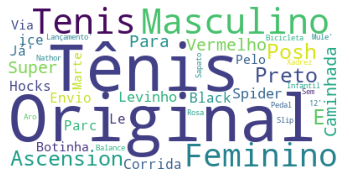

In [201]:
wordcloud = WordCloud(background_color = "white").generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [202]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loreluraghi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
stoplistword = set(stopwords.words('portuguese','english'))

In [204]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [205]:
df['ITE_ITEM_TITLE_2'] = df['ITE_ITEM_TITLE'].apply(unidecode)
df['ITE_ITEM_TITLE_3'] = df['ITE_ITEM_TITLE_2'].apply(str.lower)
df["ITE_ITEM_TITLE_4"] = df['ITE_ITEM_TITLE_3'].apply(remove_punctuations)
#df['word_array'] = df['doc'].apply(palabras_array)


In [206]:
df

,ITE_ITEM_TITLE,ITE_ITEM_TITLE_2,ITE_ITEM_TITLE_3,ITE_ITEM_TITLE_4
0,Tênis Ascension Posh Masculino - Preto E Verme...,Tenis Ascension Posh Masculino - Preto E Verme...,tenis ascension posh masculino - preto e verme...,tenis ascension posh masculino preto e vermelho
1,Tenis Para Caminhada Super Levinho Spider Corr...,Tenis Para Caminhada Super Levinho Spider Corr...,tenis para caminhada super levinho spider corr...,tenis para caminhada super levinho spider corr...
2,Tênis Feminino Le Parc Hocks Black/ice Origina...,Tenis Feminino Le Parc Hocks Black/ice Origina...,tenis feminino le parc hocks black/ice origina...,tenis feminino le parc hocks blackice original...
3,Tênis Olympikus Esportivo Academia Nova Tendên...,Tenis Olympikus Esportivo Academia Nova Tenden...,tenis olympikus esportivo academia nova tenden...,tenis olympikus esportivo academia nova tenden...
4,Inteligente Led Bicicleta Tauda Luz Usb Bicicl...,Inteligente Led Bicicleta Tauda Luz Usb Bicicl...,inteligente led bicicleta tauda luz usb bicicl...,inteligente led bicicleta tauda luz usb bicicl...
...,...,...,...,...
29995,Tênis Vans Old Skool I Love My Vans - Usado - ...,Tenis Vans Old Skool I Love My Vans - Usado - ...,tenis vans old skool i love my vans - usado - ...,tenis vans old skool i love my vans usado fe...
29996,Tênis Feminino Preto Moleca 5296155,Tenis Feminino Preto Moleca 5296155,tenis feminino preto moleca 5296155,tenis feminino preto moleca 5296155
29997,Tenis Botinha Com Pelo Via Marte Original Lanç...,Tenis Botinha Com Pelo Via Marte Original Lanc...,tenis botinha com pelo via marte original lanc...,tenis botinha com pelo via marte original lanc...
29998,Tênis Slip On Feminino Masculino Original Sapa...,Tenis Slip On Feminino Masculino Original Sapa...,tenis slip on feminino masculino original sapa...,tenis slip on feminino masculino original sapa...


In [207]:
from fuzzywuzzy import fuzz

In [208]:
def partial(data_to_search:str,data:str):
    return fuzz.partial_ratio(data_to_search,data)

def default(data_to_search:str,data:str):
    return fuzz.ratio(data_to_search,data)

def order(data_to_search:str,data:str):
    return fuzz.token_sort_ratio(data_to_search,data)

def set_ratio(data_to_search:str,data:str):
    return fuzz.token_set_ratio(data_to_search,data)

In [209]:
print(f"Partial score {partial(df['ITE_ITEM_TITLE'][1], df['ITE_ITEM_TITLE'][1])}")

Partial score 100


In [220]:
df.sample(1000)

,ITE_ITEM_TITLE,ITE_ITEM_TITLE_2,ITE_ITEM_TITLE_3,ITE_ITEM_TITLE_4
6880,Tênis Infantil Leve Olympikus Original Exercíc...,Tenis Infantil Leve Olympikus Original Exercic...,tenis infantil leve olympikus original exercic...,tenis infantil leve olympikus original exercic...
3255,Tênis Casual Mocassin Slip On Masculino Origi...,Tenis Casual Mocassin Slip On Masculino Origi...,tenis casual mocassin slip on masculino origi...,tenis casual mocassin slip on masculino origi...
1661,Tenis Tweenie 501 #play 949501047 - Referência...,Tenis Tweenie 501 #play 949501047 - Referencia...,tenis tweenie 501 #play 949501047 - referencia...,tenis tweenie 501 play 949501047 referencia 5...
121,Tênis Olympikus Elevation Feminino Sport Camin...,Tenis Olympikus Elevation Feminino Sport Camin...,tenis olympikus elevation feminino sport camin...,tenis olympikus elevation feminino sport camin...
1494,Tenis Esportivo Pro 9 Masculino Feminino Frete...,Tenis Esportivo Pro 9 Masculino Feminino Frete...,tenis esportivo pro 9 masculino feminino frete...,tenis esportivo pro 9 masculino feminino frete...
...,...,...,...,...
1020,Rodillera Elastica De Gel /ginásio De Compress...,Rodillera Elastica De Gel /ginasio De Compress...,rodillera elastica de gel /ginasio de compress...,rodillera elastica de gel ginasio de compressa...
25264,"Bike Zx2000 Aro 26, 21 Suspensão, Freio Disc, ...","Bike Zx2000 Aro 26, 21 Suspensao, Freio Disc, ...","bike zx2000 aro 26, 21 suspensao, freio disc, ...",bike zx2000 aro 26 21 suspensao freio disc shi...
21033,Tênis Feminino Casual Capricho Week Canvas Pre...,Tenis Feminino Casual Capricho Week Canvas Pre...,tenis feminino casual capricho week canvas pre...,tenis feminino casual capricho week canvas pre...
2000,Auto Falantes Da Tv Lg42pq30 Com Chicote,Auto Falantes Da Tv Lg42pq30 Com Chicote,auto falantes da tv lg42pq30 com chicote,auto falantes da tv lg42pq30 com chicote


In [235]:
#Generamos un dataset de test con 1000 obs


 
# initialize data of lists.
s1 = df.sample(1000).reset_index()[["ITE_ITEM_TITLE",'ITE_ITEM_TITLE_4']].rename(columns={'ITE_ITEM_TITLE':'ITE_ITEM_TITLE_1',"ITE_ITEM_TITLE_4":'ITE_ITEM_TITLE_4_1'})
s2 = df.sample(1000).reset_index()[["ITE_ITEM_TITLE",'ITE_ITEM_TITLE_4']].rename(columns={'ITE_ITEM_TITLE':'ITE_ITEM_TITLE_2',"ITE_ITEM_TITLE_4":'ITE_ITEM_TITLE_4_2'})




df_sample = pd.concat([s1,s2],axis=1)

In [237]:
df_sample

,ITE_ITEM_TITLE_1,ITE_ITEM_TITLE_4_1,ITE_ITEM_TITLE_2,ITE_ITEM_TITLE_4_2
0,Tênis Feminino Preto Sapatênis Confort Casual ...,tenis feminino preto sapatenis confort casual ...,Tv Samsung Com Tela Quebrada Menos De Um Mês D...,tv samsung com tela quebrada menos de um mes d...
1,Tênis Street King Masculino Veloce Preto Latex,tenis street king masculino veloce preto latex,Tênis Pk Xd Pampili Nalu Unicórnio Com Glitter...,tenis pk xd pampili nalu unicornio com glitter...
2,Tênis Casual Actvitta Slipper Tecido Preto 420...,tenis casual actvitta slipper tecido preto 420...,Meia Hupi Mãe E Pai Preta Com Vermelho Tam: Único,meia hupi mae e pai preta com vermelho tam unico
3,Tênis Feminino Neway Chunky Com Pedras Tratora...,tenis feminino neway chunky com pedras tratora...,Tenis Olympikus Feminino Candy Conforto Academ...,tenis olympikus feminino candy conforto academ...
4,Bicicleta Aro 26 Circular 5.9 Contrapedal Verm...,bicicleta aro 26 circular 59 contrapedal verme...,Nike X Off-white Dunk Low University Red,nike x offwhite dunk low university red
...,...,...,...,...
995,Yolanda - Tênis Espadrille Pina Forn:ylnd3097-...,yolanda tenis espadrille pina fornylnd3097lila,Tênis Fila F 1911 Masculino Casual Verde Origi...,tenis fila f 1911 masculino casual verde origi...
996,Bicicleta Mtb Ox Glide 29 17 21 Velocidades P...,bicicleta mtb ox glide 29 17 21 velocidades p...,Sapatênis Masculino E Cano Alto Couro Legítimo...,sapatenis masculino e cano alto couro legitimo...
997,Tênis De Skate Hocks Sonora Black Gun Original,tenis de skate hocks sonora black gun original,Tênis Star Infantil Now United Casual E Casaco...,tenis star infantil now united casual e casaco...
998,Tênis Cano Alto Luna Now United Pampili Preto,tenis cano alto luna now united pampili preto,Tênis Dakota G0521 Lançamento,tenis dakota g0521 lancamento


In [238]:
def f(df):
    return partial(df['ITE_ITEM_TITLE_4_1'],df['ITE_ITEM_TITLE_4_2'])


df_sample['SCORE'] = df_sample.apply(f, axis=1)

In [239]:
df_sample[['ITE_ITEM_TITLE_1','ITE_ITEM_TITLE_2','SCORE']].sort_values(by='SCORE',ascending=False)

,ITE_ITEM_TITLE_1,ITE_ITEM_TITLE_2,SCORE
783,Tênis Preto Feminino Academia,Tenis Feminino Academia Caminhada Super Confor...,79
194,Tenis Feminino Olympikus Venus 689,Tênis Feminino Olympikus Triunfo Preto,79
928,Sapatilha De Ciclismo Mtb Preta Resistente M...,Sapatilha Ciclismo Mtb Com Clip,78
523,Tênis Masculino Linear Olympikus Original Trei...,Tenis Masculino Olympikus Twist Original Barat...,74
445,Tênis Esportivo Olympikus Ultra Unissex Traini...,Tênis Esportivo Masculino Olympikus Fourty,69
...,...,...,...
981,Bicicleta Aro 26 Tuff Laranja 21v Freio A Disc...,Tênis Feminino Slip On Sapatilha Flat Form Con...,11
303,Moda Outdoor Leisure Sapatos De Montanhismo Sa...,Tenis Infantil Slip Menina Iate Casual Barato ...,10
191,"Bicicleta Aro 29 Ksw 24v Acera, Freio Hidrauli...",E Tenis Fem 974010 Rse/rel Oursd/vzbco/esp Pic...,10
345,Cronômetro De Montagem Para Computador De Bici...,Tênis Feminino Olympikus Swift 2 - Azul,10


Referencias:
    
- acentos en portugues: https://rogeriopradoj.com/2019/07/14/como-tirar-acentos-de-string-no-python-transliterate-unicodedata-e-unidecode//
- Fuzzywuzzy: https://jairoandres.com/string-matching-a-lo-pythonico/
        
